
## data_month2
#### IPHONE charger | ipad 9.7 นิ้ว |                                          


In [1]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random


d = 31
time_a = pd.date_range('2016-11-01 00:00:00', periods=5760*d, freq='15S')
# print time_a
time_b = pd.date_range('2016-11-01 00:00:14', periods=5760*d, freq='15S')
# print time_b

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

####### set databases to empty #########
query_empty = """truncate table data_month2.iphonecharger""" 
c.execute(query_empty)
print "data_month2.iphonecharger are Empty!!! \n"

query = "SELECT watt FROM collected_info.13_iphonecharger WHERE no >= '%s'   AND no <= '%s'; "% (0,1200)
df = pd.read_sql(query, conn)
# print df.watt[5]

#### Random the turning-on time appliances
def rand_turnon():
    duration_sec =  random.randint(0, 59)
    duration_min =  random.randint(0, 59)
    duration_hour1 = ['18'] * 5 + ['19'] * 8 + ['20'] * 36 + ['21'] * 30 + ['22'] * 13 + ['23'] * 6 + ['0'] * 2
    duration_hour = random.choice(duration_hour1)     
    if 0 < duration_sec <= 15:
        k = 0
    elif 15 < duration_sec <= 30:
        k = 1
    elif 30 < duration_sec <= 45:
        k = 2
    else:
        k = 3
    off_item = (int(duration_hour)*240) + (int(duration_min)*4)+ k 
    print "time to turn-on appliacne on",duration_hour,":",duration_min,":",duration_sec,"equal to",off_item,"items"
    return off_item

 
#### Random the off-duration appliances 
def rand_duration():
    duration_sec =  random.randint(0, 59)
    duration_min =  random.randint(10, 40)
    duration_hour1 = ['0'] * 2 + ['1'] * 25 + ['2'] * 35+ ['3'] * 20 + ['4'] * 10 + ['5'] * 8
    duration_hour = random.choice(duration_hour1)   
    seconds = (int(duration_hour)*3600)+(duration_min*60)+duration_sec
    no_item = seconds/15
    print "consuming the appliance", duration_hour,"hours",duration_min,"minutes",duration_sec,"seconds that equal to",seconds,"seconds or",no_item,"items"
    return no_item

days = 0
j = 0
i = 0
print "\nDays :",days ,":",time_b[j].strftime('%a')
off_item = rand_turnon()  
no_item = rand_duration()  

while (j <= (5760*d)-1):  
    c.execute("INSERT INTO data_month2.iphonecharger (Timestamp, watt) VALUES (%s, %s)",(time_b[j],0))
    conn.commit()
    j += 1 
          
    while (off_item+(5760*(days)) <= j <= (no_item+off_item)+(5760*(days))):                   
        c.execute("INSERT INTO data_month2.iphonecharger (Timestamp, watt) VALUES (%s, %s)",(time_b[j],df.watt[i]))
        conn.commit()
        i += 1 
        j += 1
            
        if (i >= len(df)):
            i = 0  
        if (j == (no_item+off_item)+(5760*(days))):
            days +=1
            print "\nDays :",days ,":",time_b[j].strftime('%a')
            off_item = rand_turnon()  
            no_item = rand_duration() 
            i= 0   

                    
print "DONE!"


data_month2.iphonecharger are Empty!!! 


Days : 0 : Tue
time to turn-on appliacne on 22 : 41 : 27 equal to 5445 items
consuming the appliance 2 hours 33 minutes 14 seconds that equal to 9194 seconds or 612 items

Days : 1 : Wed
time to turn-on appliacne on 19 : 2 : 33 equal to 4570 items
consuming the appliance 1 hours 20 minutes 29 seconds that equal to 4829 seconds or 321 items

Days : 2 : Wed
time to turn-on appliacne on 20 : 43 : 38 equal to 4974 items
consuming the appliance 2 hours 29 minutes 38 seconds that equal to 8978 seconds or 598 items

Days : 3 : Thu
time to turn-on appliacne on 20 : 9 : 11 equal to 4836 items
consuming the appliance 2 hours 35 minutes 43 seconds that equal to 9343 seconds or 622 items

Days : 4 : Fri
time to turn-on appliacne on 20 : 27 : 18 equal to 4909 items
consuming the appliance 2 hours 35 minutes 58 seconds that equal to 9358 seconds or 623 items

Days : 5 : Sat
time to turn-on appliacne on 19 : 34 : 27 equal to 4697 items
consuming the appliance

IndexError: index 178560 is out of bounds for axis 0 with size 178560

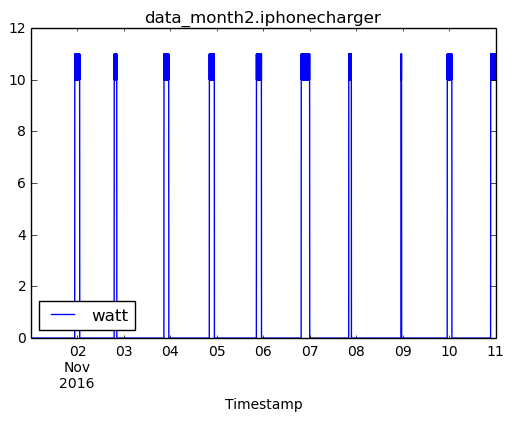

In [2]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
%matplotlib inline  


query = "SELECT Timestamp,watt FROM data_month2.iphonecharger WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[5760*10])
df = pd.read_sql(query, conn, index_col=['Timestamp'])
fig, ax = plt.subplots()
ax.set_title('data_month2.iphonecharger')
df.plot(ax=ax )
plt.show()